In [9]:
#Import requeired libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()

In [2]:
df = pd.DataFrame(data = np.c_[housing['data'], housing['target']],
                 columns= housing.feature_names + ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Check data structure

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Check empty values

In [44]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Check features correlation

<Axes: >

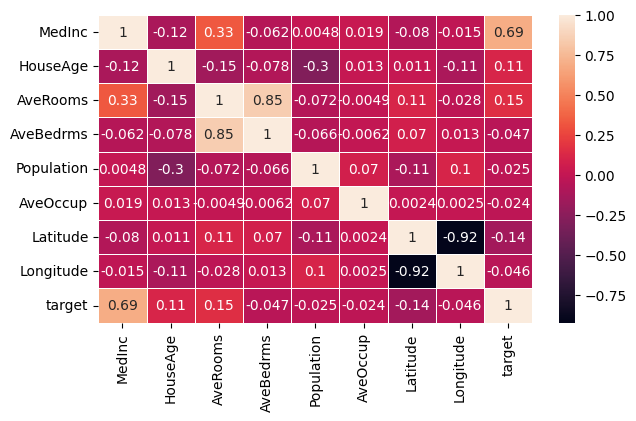

In [45]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(df_corr, annot=True, linewidths=.5)

In [46]:
#Check correlation between features and target
df_corr['target']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
target        1.000000
Name: target, dtype: float64

We can see that Latitude and Longitude are highly correlated, so we can leave only Latitude since it's correlation with target is higher.
We can see that AveRooms and AveBedrms are highly correlated, so we can leave only AveRooms since it's correlation with target is higher.
We can remove features with very low correlation with target: Population, AveOccup

In [3]:
x = df[df.columns.drop(['Longitude','AveBedrms','Population','AveOccup', 'target'])]
y = df['target']

Split data to train and test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   shuffle=True)

Scale data because the values are not uniform

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_scaled = scaler.transform(x)

Create and train model

In [6]:
mod = RandomForestRegressor()
mod.fit(x_train_scaled, y_train)
preds = mod.predict(x_test_scaled)

Count metrics

In [8]:
print("R2: ", r2_score(y_test, preds))
print("RMSR: ", mean_squared_error(y_test,preds, squared=False))

R2:  0.6625833069840867
RMSR:  0.6648808673536005


The model performs better than random, so let's try to find better parameters for themodel using grid search

In [13]:
#set model parameters
#max_depths = np.arange(10, 100, 10)
params = {"min_samples_leaf":[5, 10, 100, 200, 500],
          "max_depth": np.arange(10, 100, 10),
         "max_features":[1, 2, 3, 4]}

#create grid search model
mod_grid = GridSearchCV(mod,
                       params,
                       cv=5,
                       scoring='r2')

#train grid model
mod_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 10, 100, 200, 500]},
             scoring='r2')

In [14]:
#find the best parameters
mod_grid.best_estimator_

RandomForestRegressor(max_depth=60, max_features=2, min_samples_leaf=5)

In [17]:
#Check model with found parameters
mod_best = RandomForestRegressor(max_depth=60, max_features=2, min_samples_leaf=5)
mod_best.fit(x_train_scaled, y_train)
preds_best = mod_best.predict(x_test_scaled)

print("R2: ", r2_score(y_test, preds_best))
print("RMSR: ", mean_squared_error(y_test, preds_best, squared=False))

R2:  0.677684657185837
RMSR:  0.6498319243416624
